In [5]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [6]:
env = BlackjackEnv()

In [10]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo first-visit prediction algorithm. Calculates the value function
    for a given policy using sampling .
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # Keep track of how many times we have seen the states during the episode\
    # For a single episode we can see a state 0 or 1 times as we do first-visit MC
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i in range(num_episodes):
        
        state = env.reset()
        
        game_over = False
        episode = []  # is a list of steps
        
        while not game_over:
            action = policy(state)
            next_state, reward, game_over, _ = env.step(action)
            episode.append((state, action, reward))
            if game_over:
                break
            else:
                state = next_state
         
        accumulated_return = 0
        returns_for_episode = {}        
        # As we going backwards, returns will be calculated for first-entry of the states
        episode.reverse()
        for (state, action, reward) in episode:
            accumulated_return += reward 
            returns_for_episode[state] = accumulated_return
        
        for state, return_for_state in returns_for_episode.items():
            returns_count[state] += 1
            # Do averaging update https://math.stackexchange.com/questions/106700/incremental-averageing
            V[state] += (return_for_state - V[state]) / returns_count[state]            
            
    return V


In [3]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1


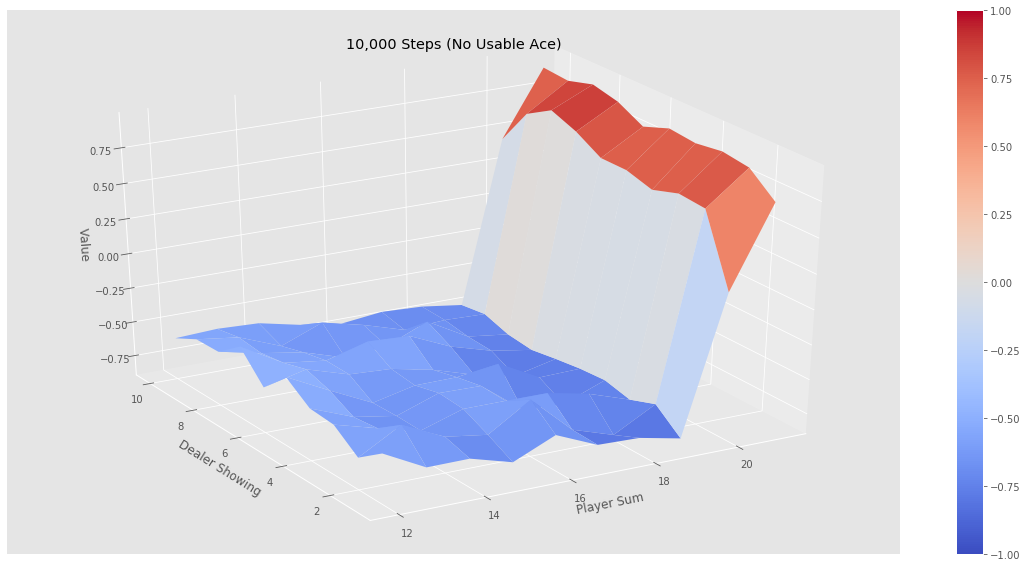

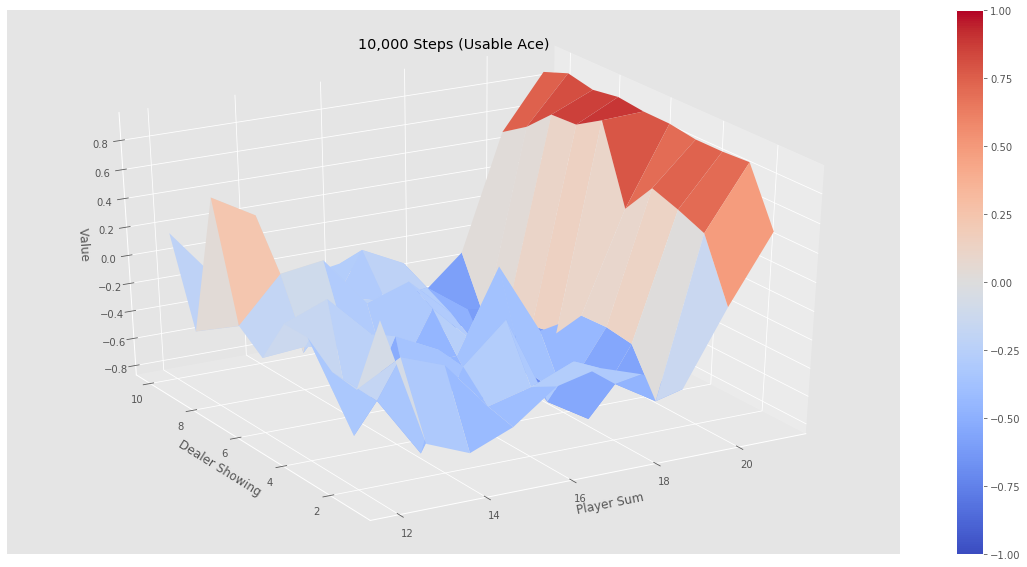

In [12]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")
